# Classification of Obesity Levels using PCA and Random Forest
Dataset: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

dataset paper: https://doi.org/10.1016/j.dib.2019.104344

implementation paper: https://ijisrt.com/assets/upload/files/IJISRT22DEC1619.pdf

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = fetch_ucirepo(id=544) 

X = data.data.features 
y = data.data.targets

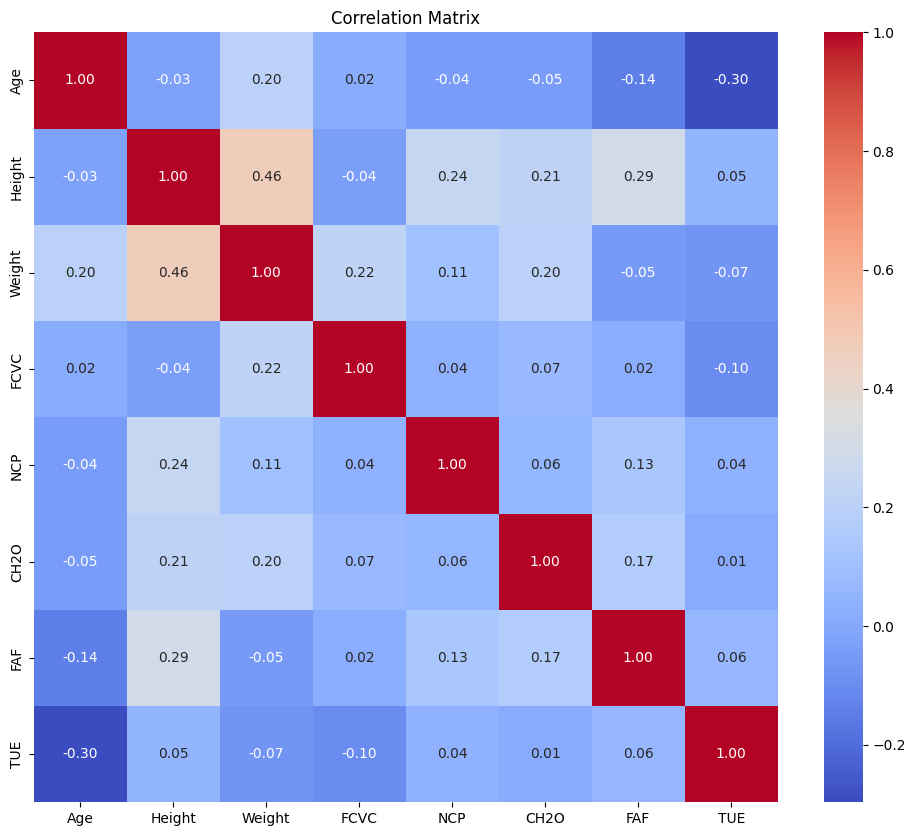

In [42]:
X.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [43]:
X = pd.get_dummies(X, drop_first=True)
y = y.values.ravel()

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
scores = []
for n in range(4, 20, 2):
    # Apply PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Train a classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_pca, y_train)
    
    # Evaluate the classifier
    scores.append(clf.score(X_test_pca, y_test))

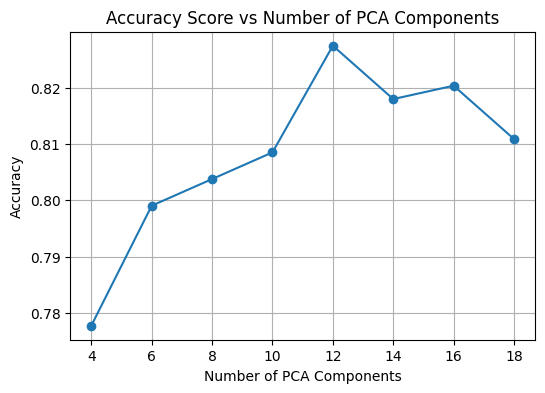

In [45]:
plt.figure(figsize=(6, 4))
plt.plot(range(4, 20, 2), scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy Score vs Number of PCA Components')
plt.grid(True)
plt.show()

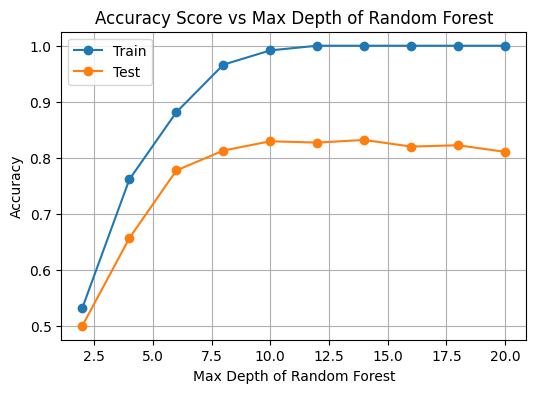

In [46]:
# tune max depth of random forest
train_scores = []
test_scores = []
for depth in range(2, 21, 2):
    clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    clf.fit(X_train_pca, y_train)
    train_score = clf.score(X_train_pca, y_train)
    train_scores.append(train_score)
    test_score = clf.score(X_test_pca, y_test)
    test_scores.append(test_score)
plt.figure(figsize=(6, 4))
plt.plot(range(2, 21, 2), train_scores, marker='o', label='Train')
plt.plot(range(2, 21, 2), test_scores, marker='o', label='Test')
plt.xlabel('Max Depth of Random Forest')
plt.ylabel('Accuracy')
plt.title('Accuracy Score vs Max Depth of Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_pca, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.8187224553579266


In [ ]:
# Apply PCA
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf = RandomForestClassifier(max_depth=30, min_samples_split=2 ,n_estimators=300, random_state=42)
clf.fit(X_train_pca, y_train)


print('Train accuracy:', clf.score(X_train_pca, y_train))
print('Mean Validation accuracy:', cross_val_score(clf, X_train_pca, y_train, cv=5).mean())
print('Test accuracy:', clf.score(X_test_pca, y_test))

# Predict and evaluate
y_pred =clf.predict(X_test_pca)
print(classification_report(y_test, y_pred))

Train accuracy: 1.0
Mean Validation accuracy: 0.8234596948360929
Test accuracy: 0.8297872340425532
                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.91      0.89        56
      Normal_Weight       0.67      0.68      0.67        62
     Obesity_Type_I       0.84      0.81      0.82        78
    Obesity_Type_II       0.90      0.95      0.92        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.72      0.70      0.71        56
Overweight_Level_II       0.79      0.76      0.78        50

           accuracy                           0.83       423
          macro avg       0.83      0.83      0.83       423
       weighted avg       0.83      0.83      0.83       423



In [22]:
orders = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

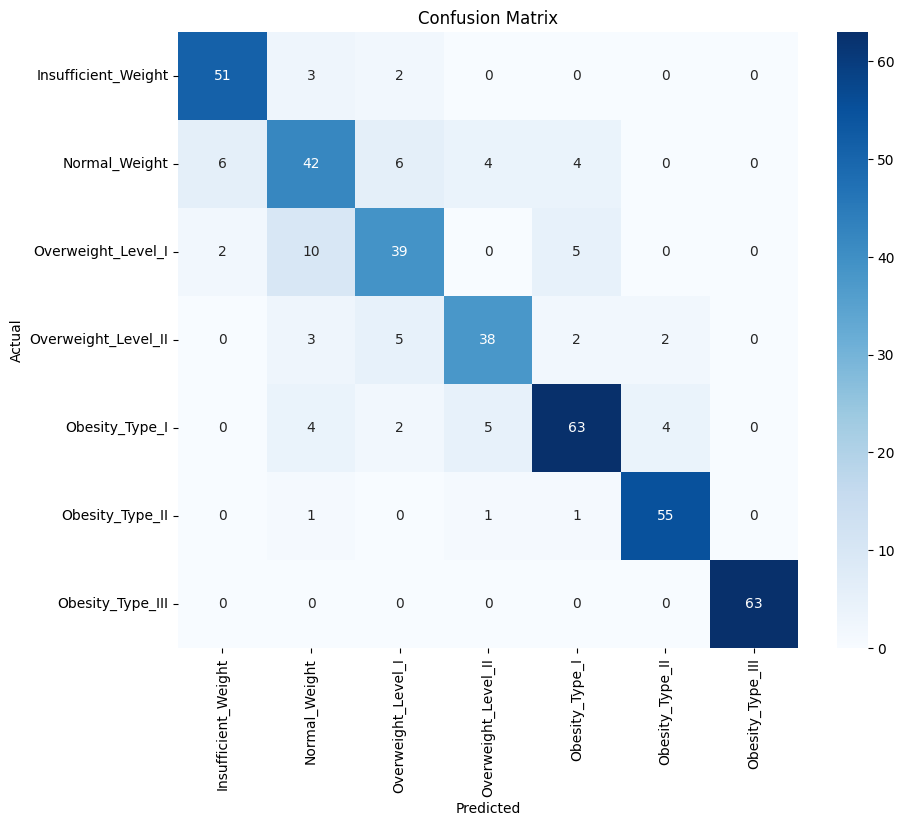

In [28]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=orders)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=orders, yticklabels=orders)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# Initialize the classifier
clf_no_pca = RandomForestClassifier(max_depth=30, min_samples_split=2, n_estimators=300, random_state=42)

# Train the classifier
clf_no_pca.fit(X_train, y_train)

# Evaluate the classifier
print('Train accuracy without PCA:', clf_no_pca.score(X_train, y_train))
print('Mean Validation accuracy without PCA:', cross_val_score(clf_no_pca, X_train, y_train, cv=5).mean())
print('Test accuracy without PCA:', clf_no_pca.score(X_test, y_test))

# Predict and evaluate
y_pred_no_pca = clf_no_pca.predict(X_test)
print(classification_report(y_test, y_pred_no_pca))

Train accuracy without PCA: 1.0
Mean Validation accuracy without PCA: 0.942536828613067
Test accuracy without PCA: 0.9479905437352246
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        56
      Normal_Weight       0.85      0.90      0.88        62
     Obesity_Type_I       0.99      0.95      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.91      0.88      0.89        56
Overweight_Level_II       0.94      0.96      0.95        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



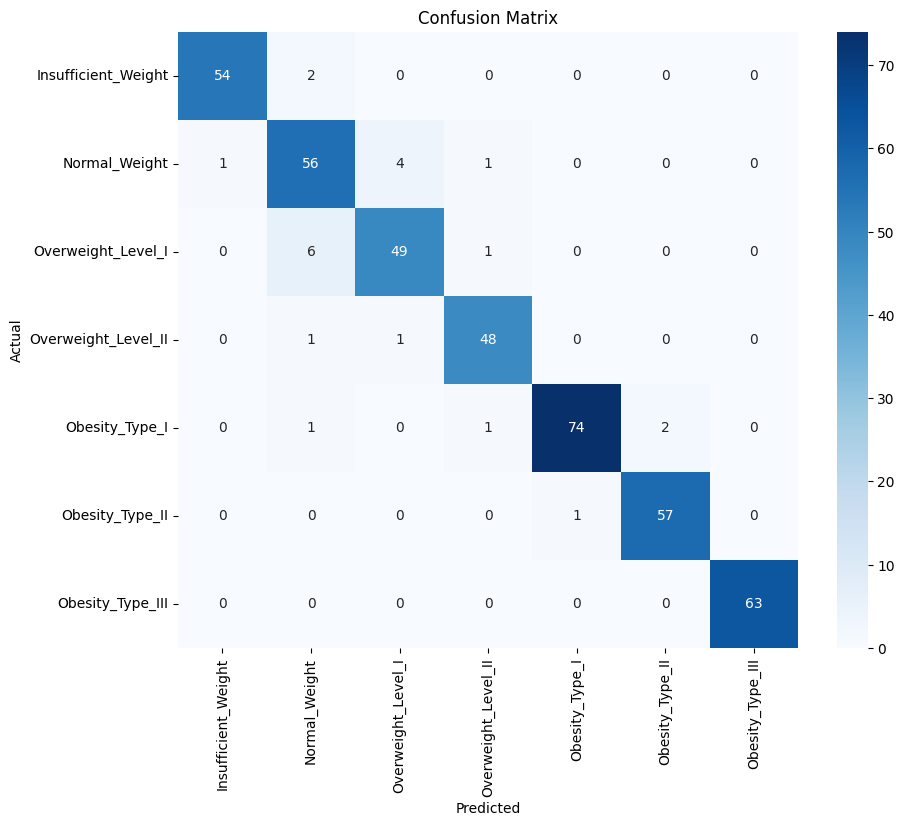

In [50]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_no_pca, labels=orders)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=orders, yticklabels=orders)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()